In [1]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [3]:
colors = {'regdir':'b', 'seq2seq':'r', 'mlps2s': 'g', 'convo': 'c', 'mlpdir': 'y'}

def find_exp(query):
    return col.find(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp, n=10):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = {'regdir':[], 'seq2seq':[], 'mlps2s':[],'convo':[],'mlpdir':[]}
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff[exp['arch']['mode']].append((np.sum(data[:,1]), exp))
        axes.plot(data[:,0], data[:,1],colors[exp['arch']['mode']])

    
    besta = {}
    for type in ldiff:
        besta[type] = [b[1] for b in sorted(ldiff[type], reverse=True)[:n]]


        for exp in besta[type]:
            axes = fig.add_subplot(1, 2, 2)
            data = np.array(exp['result'])
            axes.plot(data[:,0], data[:,1], colors[exp['arch']['mode']])
            axes.plot(data[:,0], data[:,3], colors[exp['arch']['mode']]+'--')
            
    return besta

    

In [4]:
query1= {'status':'done', 
         #'arch.mode':'seq2seq',
             #   'data.lag':32, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [5]:
count_exp(query1)

4967


In [8]:
res1= find_exp(query1)

#print res1['arch']

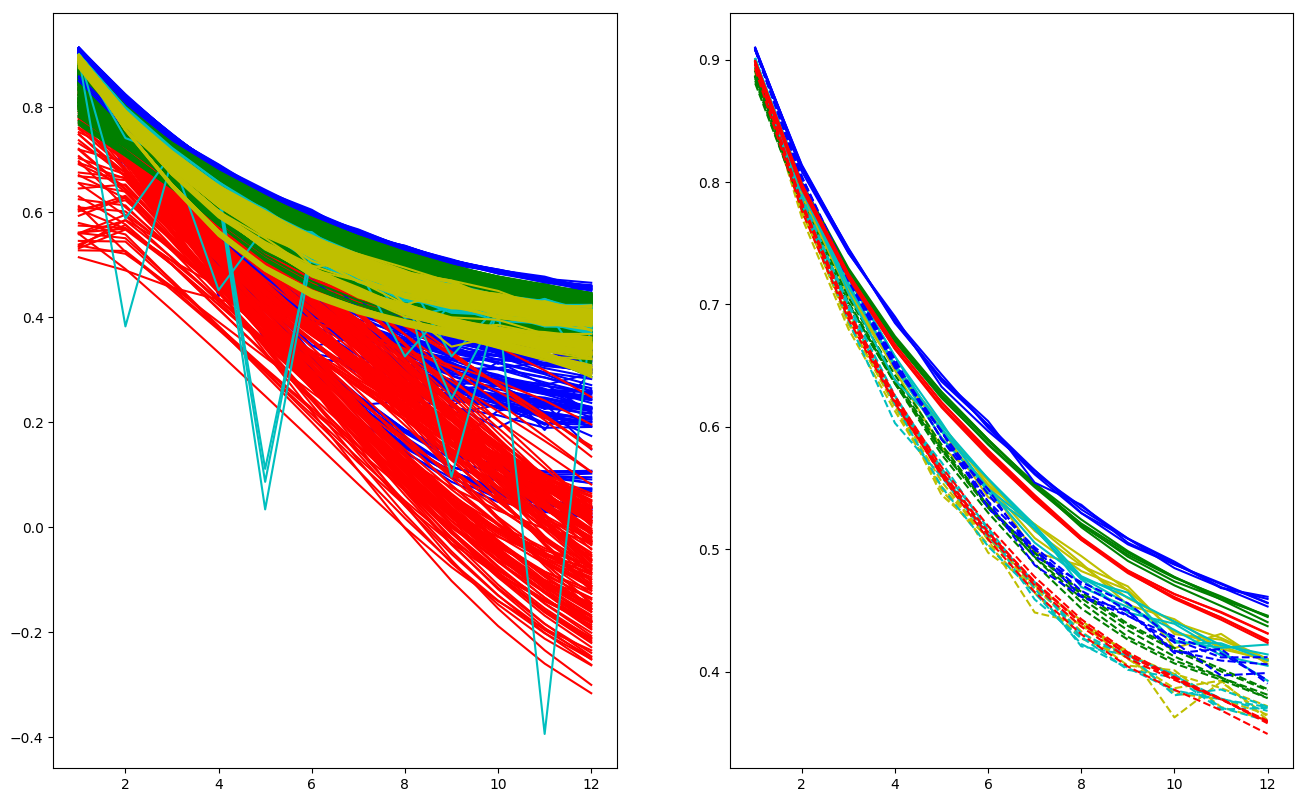

In [9]:
best = compare_exp(res1, n=5)

In [57]:
i=2
type = 'mlpdir'

print('ID:', best[type][i]['_id'])
print('DS:', best[type][i]['data']['dataset'])
print('LAG:', best[type][i]['data']['lag'])
print('VARS:', best[type][i]['data']['vars'])
print('RNN:', best[type][i]['arch']['rnn'] if 'rnn' in best[type][i]['arch'] else '')
print('NLY:', best[type][i]['arch']['nlayers'])
print('NLYE:', best[type][i]['arch']['nlayersE'] if 'nlayersE' in best[type][i]['arch'] else '')
print('NLYD', best[type][i]['arch']['nlayersD'] if 'nlayersD' in best[type][i]['arch'] else '') 
print('NNEUR:', best[type][i]['arch']['neurons'] if 'neurons' in best[type][i]['arch'] else '')
print('NNEURD:', 0 if not 'neuronsD' in  best[type][i]['arch'] else best[type][i]['arch']['neuronsD'])
print('DROP:', best[type][i]['arch']['drop'])
print('BI:',best[type][i]['arch']['bidirectional'] if 'bidirectional' in best[type][i]['arch'] else '')
print('FILT:', best[type][i]['arch']['filters'] if 'filters' in best[type][i]['arch'] else '')
print('STRD:', best[type][i]['arch']['strides'] if 'strides' in best[type][i]['arch'] else '')
print('KERSIZ:', best[type][i]['arch']['kernel_size'] if 'kernel_size' in best[type][i]['arch'] else '')    
print('ACT:', best[type][i]['arch']['activation'])
print('MODE:', best[type][i]['arch']['mode'])
print('OPT:', best[type][i]['training']['optimizer'])
print('FULLLY:', best[type][i]['arch']['full'])

print(np.array(best[type][i]['result'])[:,1])

('ID:', u'1524569826')
('DS:', 1)
('LAG:', 6)
('VARS:', [0, 1, 2, 3, 4, 5])
('RNN:', '')
('NLY:', 2)
('NLYE:', '')
('NLYD', '')
('NNEUR:', '')
('NNEURD:', 0)
('DROP:', 0)
('BI:', '')
('FILT:', '')
('STRD:', '')
('KERSIZ:', '')
('ACT:', u'relu')
('MODE:', u'mlpdir')
('OPT:', u'adamax')
('FULLLY:', [128])
[0.88969101 0.75693469 0.6532345  0.56475631 0.49711786 0.4505729
 0.41710192 0.39096545 0.37673552 0.356084   0.33199158 0.30459555]


In [8]:
i=0
for type in best:
    print(type, np.array(best[type][i]['result'])[:,1])  

('mlpdir', array([0.89830886, 0.78454313, 0.71078025, 0.64965822, 0.59802667,
       0.55579601, 0.51492255, 0.48673415, 0.45998703, 0.44027631,
       0.42744768, 0.41037495]))
('mlps2s', array([0.89028615, 0.79685785, 0.72747986, 0.67260415, 0.62832063,
       0.58953243, 0.55356872, 0.5201536 , 0.49378728, 0.47363851,
       0.45910511, 0.44572036]))
('convo', array([0.89823381, 0.79280691, 0.71477543, 0.6507843 , 0.60116633,
       0.55752343, 0.51642419, 0.47579219, 0.46441122, 0.42361909,
       0.42312017, 0.40932576]))
('regdir', array([0.90769386, 0.81398563, 0.74528206, 0.684751  , 0.63929894,
       0.60113819, 0.56214923, 0.53505827, 0.50872348, 0.48454918,
       0.46870792, 0.45930467]))
('seq2seq', array([0.89787923, 0.79823203, 0.72437538, 0.66713222, 0.62014338,
       0.58090355, 0.54418795, 0.50974762, 0.48261613, 0.46319924,
       0.44873676, 0.43128099]))
